This notebook investigates to what extent "clouds" close the budget for certain relevant variables such as liquid water, mass flux etc. "Clouds" are decomposed with two different thresholds: initially simply by considering all points containing liquid water and then a threshold which includes both liquid water and vertical velocity (updraft). 

The idea is is similar to the work done by Siebesma & Cuijpers (1994) who discovered that "estimates of turbulent fluxes by bulk cloud updrafts and environmental downdrafts give an underestimation of 20% to 50% depending on the variable that is transported" 

Here, I use the data from the RICO simulation to calculate the total variable and then compare it to the result from the cloudtracking algorithm, initally for liquid water. 

# VanZanten et al., 2011, RICO paper

They also plot the heat fluxes (in the standard units of $[\frac{W}{m^2}]$), but they define the surface sensible heat flux as 
$$\rho_0c_p\overline{w'\theta'}$$
and latent heat flux as 
$$\rho_0 L_v\overline{w'q_t'}$$
Comparing this to the equation (4.2) from (Siebesma & Cujipers, 1995): 
$$\big(w'\phi'\big) = \frac{M}{\rho}(\phi_c - \phi_e)$$
We can notice that when using this equation for $\theta_l$ for example, multiplying it with $\rho c_p$ produces a result in the units used in the S&C,1995 plot (heat flux units). Similarly, when using $q_t$, multiplying with $\rho L_v$ produces the correct units.




# - - - - - - - - - - - - - - - - - - - -RESOLVED- - - - - - - - - - - - - - - - - - - -
# On the Mass-Flux Representation of Vertical Transport in Moist, Zhu (2015)

Provides all the needed information

## Average over time

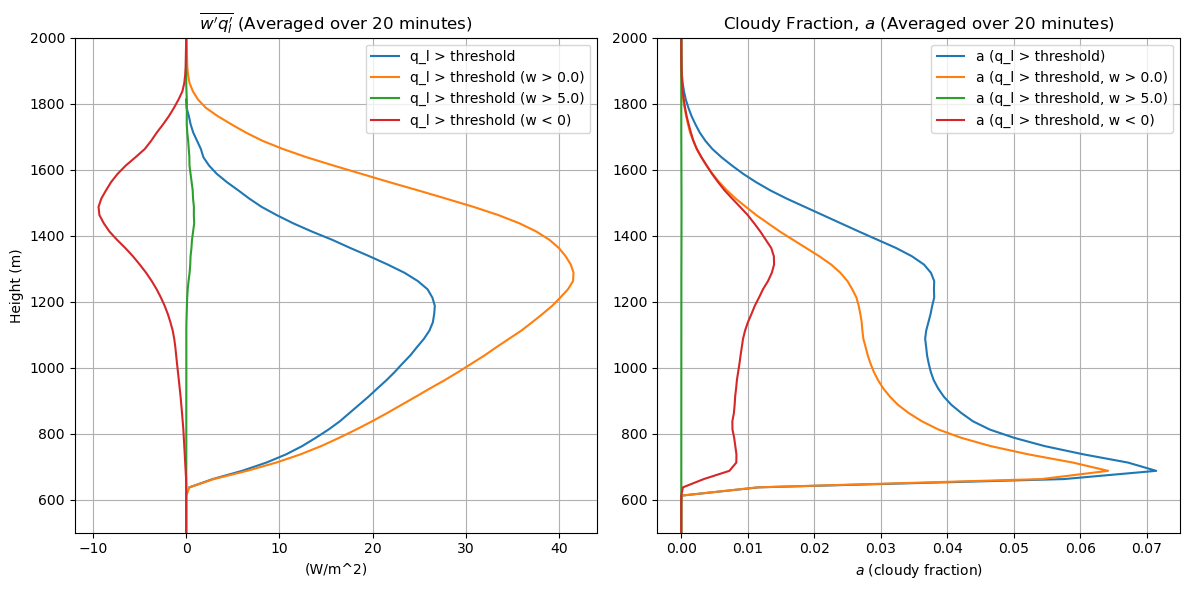

In [36]:
# needs to be fixed!!

# import numpy as np
# import netCDF4 as nc
# import matplotlib.pyplot as plt
# import os

# # Constants
# liquid_water_threshold = 0.0000001
# vertical_velocity_thresholds = [0.0, 5.0]
# rho_0 = 1.25  # kg/m^3
# L_v = 2.5e6   # J/kg

# # File paths
# w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
# l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'

# def load_data_all_levels(filename, var_name, timestep):
#     with nc.Dataset(filename) as ds:
#         data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
#     return data

# def load_zt_values(filename):
#     with nc.Dataset(filename) as ds:
#         zt_values = ds['zt'][:]
#     return zt_values

# def calculate_Mc_and_a(start_timestep, end_timestep):
#     # Initialize the result arrays
#     M_c_values = []
#     M_c_values_w_thresholds = {threshold: [] for threshold in vertical_velocity_thresholds}
#     M_c_values_w_neg_threshold = []
#     a_values = []
#     a_values_w_thresholds = {threshold: [] for threshold in vertical_velocity_thresholds}
#     a_values_w_neg_threshold = []

#     for timestep in range(start_timestep, end_timestep):
#         w_data = load_data_all_levels(w_file, 'w', timestep)
#         l_data = load_data_all_levels(l_file, 'l', timestep)
        
#         for z in range(w_data.shape[0]):
#             # Cloudy and environment masks
#             cloudy_mask = l_data[z, :, :] > liquid_water_threshold
#             environment_mask = ~cloudy_mask
            
#             # Area fractions
#             a = np.mean(cloudy_mask)
#             a_values.append(a)
            
#             # Mean vertical velocities
#             w_c = np.mean(w_data[z, :, :][cloudy_mask])
#             w_e = np.mean(w_data[z, :, :][environment_mask])
            
#             # Mean liquid water contents
#             q_l_c = np.mean(l_data[z, :, :][cloudy_mask])
#             q_l_e = np.mean(l_data[z, :, :][environment_mask])
            
#             # Calculate M_c
#             M_c = a * (1 - a) * (w_c - w_e)
            
#             # Multiply M_c with (q_l_c - q_l_e)
#             result = M_c * (q_l_c - q_l_e)
            
#             # Append the result for the current vertical level
#             M_c_values.append(result)
            
#             # Calculate for each vertical velocity threshold
#             for threshold in vertical_velocity_thresholds:
#                 mask = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] > threshold)
#                 if np.any(mask):
#                     a_thresh = np.mean(mask)
#                     w_c_thresh = np.mean(w_data[z, :, :][mask])
#                     w_e_thresh = np.mean(w_data[z, :, :][~mask])
#                     q_l_c_thresh = np.mean(l_data[z, :, :][mask])
#                     q_l_e_thresh = np.mean(l_data[z, :, :][~mask])
#                     M_c_thresh = a_thresh * (1 - a_thresh) * (w_c_thresh - w_e_thresh)
#                     result_thresh = M_c_thresh * (q_l_c_thresh - q_l_e_thresh)
#                 else:
#                     a_thresh = 0
#                     result_thresh = 0
#                 M_c_values_w_thresholds[threshold].append(result_thresh)
#                 a_values_w_thresholds[threshold].append(a_thresh)

#             # Calculate for w < 0 threshold
#             mask_neg = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] < 0)
#             if np.any(mask_neg):
#                 a_neg = np.mean(mask_neg)
#                 w_c_neg = np.mean(w_data[z, :, :][mask_neg])
#                 w_e_neg = np.mean(w_data[z, :, :][~mask_neg])
#                 q_l_c_neg = np.mean(l_data[z, :, :][mask_neg])
#                 q_l_e_neg = np.mean(l_data[z, :, :][~mask_neg])
#                 M_c_neg = a_neg * (1 - a_neg) * (w_c_neg - w_e_neg)
#                 result_neg = M_c_neg * (q_l_c_neg - q_l_e_neg)
#             else:
#                 a_neg = 0
#                 result_neg = 0
#             M_c_values_w_neg_threshold.append(result_neg)
#             a_values_w_neg_threshold.append(a_neg)

#     # Convert the result lists to numpy arrays and average over the timesteps
#     M_c_values = np.mean(np.array(M_c_values).reshape(-1, w_data.shape[0]), axis=0) * rho_0 * L_v
#     for threshold in vertical_velocity_thresholds:
#         M_c_values_w_thresholds[threshold] = np.mean(np.array(M_c_values_w_thresholds[threshold]).reshape(-1, w_data.shape[0]), axis=0) * rho_0 * L_v
#         a_values_w_thresholds[threshold] = np.mean(np.array(a_values_w_thresholds[threshold]).reshape(-1, w_data.shape[0]), axis=0)
#     M_c_values_w_neg_threshold = np.mean(np.array(M_c_values_w_neg_threshold).reshape(-1, w_data.shape[0]), axis=0) * rho_0 * L_v
#     a_values = np.mean(np.array(a_values).reshape(-1, w_data.shape[0]), axis=0)
#     a_values_w_neg_threshold = np.mean(np.array(a_values_w_neg_threshold).reshape(-1, w_data.shape[0]), axis=0)

#     return M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold, a_values, a_values_w_thresholds, a_values_w_neg_threshold

# # Load height values
# zt_values = load_zt_values(l_file)

# # Calculate for the first 20 minutes (timesteps 0-20)
# M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold, a_values, a_values_w_thresholds, a_values_w_neg_threshold = calculate_Mc_and_a(15, 35)

# # Plotting
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# # Plot M_c * (q_l_c - q_l_e) multiplied by rho_0 and L_v
# ax1.plot(M_c_values, zt_values, label='q_l > threshold')
# for threshold in vertical_velocity_thresholds:
#     ax1.plot(M_c_values_w_thresholds[threshold], zt_values, label=f'q_l > threshold (w > {threshold})')
# ax1.plot(M_c_values_w_neg_threshold, zt_values, label=f'q_l > threshold (w < 0)')

# ax1.set_xlabel('(W/m^2)')
# ax1.set_ylabel('Height (m)')
# ax1.set_title('$\overline{w^\prime q^\prime_l}$ (Averaged over 20 minutes)')
# ax1.grid(True)
# ax1.set_ylim([500, 2000])
# ax1.legend()

# # Plot a values
# ax2.plot(a_values, zt_values, label='a (q_l > threshold)')
# for threshold in vertical_velocity_thresholds:
#     ax2.plot(a_values_w_thresholds[threshold], zt_values, label=f'a (q_l > threshold, w > {threshold})')
# ax2.plot(a_values_w_neg_threshold, zt_values, label=f'a (q_l > threshold, w < 0)')

# ax2.set_xlabel('$a$ (cloudy fraction)')
# ax2.set_title('Cloudy Fraction, $a$ (Averaged over 20 minutes)')
# ax2.grid(True)
# ax2.set_ylim([500, 2000])
# ax2.legend()

# plt.tight_layout()
# plt.show()

Figured out how to calculate decomposition works from Zhu 2015 paper (detail given about the decomposition) and VanZanten et al 2011 paper (detail on multiplication with $\rho_0L_v$ or $\rho_0c_p$ depending on the quantity involved. 

Do not know how to calculate the total value heat flux - could make use of the other VanZanten equations (check overleaf). 

Any other insights? Continue into producing this for other variables. Grab the percentages of the budget closed by coherent structures and move to cloud tracking. 

## Extra variables

## Averaged over time

Changing to correct units, cleaning up plots. 

/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_52482/1015316273.py:109: UserWarning: Warning: converting a masked element to nan.
  M_c_values = np.array(M_c_values)


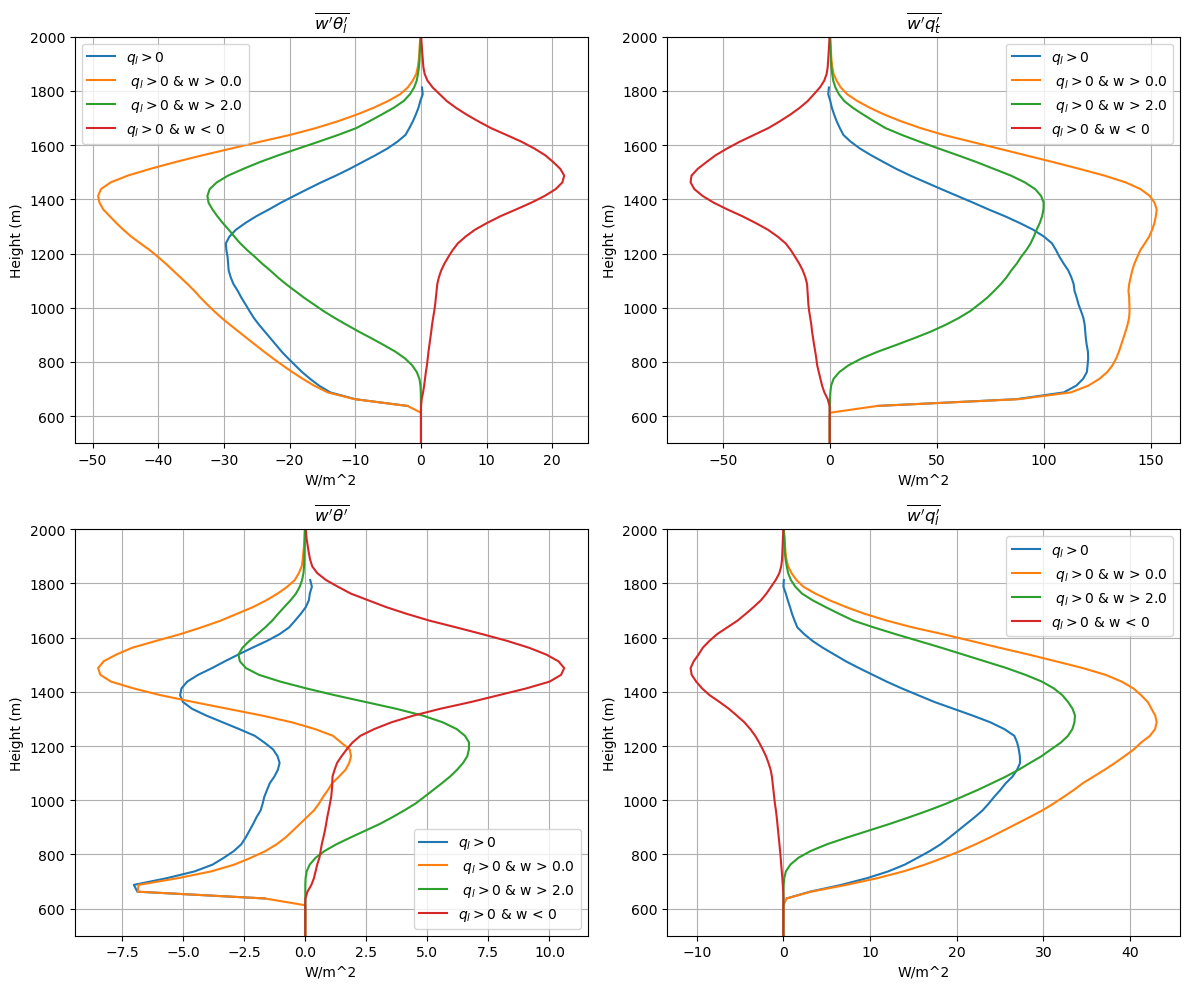

In [3]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

rho_0 = 1.25  # kg/m^3
L_v = 2.5e6    # J/kg latent heat of vaporization
c_p = 1005.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
p_0 = 100000.0  # Pa standard pressure at sea level
R_v = 461.5
R_d = 287.05         # J/kg/K gas constant for dry air
g = 9.81             # m/s^2 acceleration due to gravity
ep2 = R_v/R_d-1     # Dimensionless constant for water vapor

# Thresholds
liquid_water_threshold = 0.0000001
vertical_velocity_thresholds = [0.0, 2.0]

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values


# def calculate_theta(l_data, p_data):
#     exner = (p_level / p_0) ** (R_d / c_p)
#     T = theta_l * exner + (L_v * l_level) / c_p
#     theta = T / exner
    
def calculate_theta(theta_l_data, l_data, p_data):
    exner = (p_data / p_0) ** (R_d / c_p)
    T = theta_l_data * exner + (L_v * l_data) / c_p
    theta = T / exner
    return theta


def calculate_M_c_values(w_data, l_data, variable_data, liquid_water_threshold, vertical_velocity_thresholds, multiplier):
    M_c_values = []
    M_c_values_w_thresholds = {threshold: [] for threshold in vertical_velocity_thresholds}
    M_c_values_w_neg_threshold = []

    for z in range(w_data.shape[0]):
        # Cloudy and environment masks
        cloudy_mask = l_data[z, :, :] > liquid_water_threshold
        environment_mask = ~cloudy_mask

        # Area fractions
        a = np.mean(cloudy_mask)

        # Mean vertical velocities
        w_c = np.mean(w_data[z, :, :][cloudy_mask])
        w_e = np.mean(w_data[z, :, :][environment_mask])

        # Mean variable contents
        var_c = np.mean(variable_data[z, :, :][cloudy_mask])
        var_e = np.mean(variable_data[z, :, :][environment_mask])

        # Calculate M_c
        M_c = a * (1 - a) * (w_c - w_e)

        # Multiply M_c with (var_c - var_e) and the multiplier
        result = M_c * (var_c - var_e) * multiplier

        # Append the result for the current vertical level
        M_c_values.append(result)

        # Calculate for each vertical velocity threshold
        for threshold in vertical_velocity_thresholds:
            mask = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] > threshold)
            if np.any(mask):
                a_thresh = np.mean(mask)
                w_c_thresh = np.mean(w_data[z, :, :][mask])
                w_e_thresh = np.mean(w_data[z, :, :][~mask])
                var_c_thresh = np.mean(variable_data[z, :, :][mask])
                var_e_thresh = np.mean(variable_data[z, :, :][~mask])
                M_c_thresh = a_thresh * (1 - a_thresh) * (w_c_thresh - w_e_thresh)
                result_thresh = M_c_thresh * (var_c_thresh - var_e_thresh) * multiplier
            else:
                result_thresh = 0
            M_c_values_w_thresholds[threshold].append(result_thresh)

        # Calculate for w < 0 threshold
        mask_neg = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] < 0)
        if np.any(mask_neg):
            a_neg = np.mean(mask_neg)
            w_c_neg = np.mean(w_data[z, :, :][mask_neg])
            w_e_neg = np.mean(w_data[z, :, :][~mask_neg])
            var_c_neg = np.mean(variable_data[z, :, :][mask_neg])
            var_e_neg = np.mean(variable_data[z, :, :][~mask_neg])
            M_c_neg = a_neg * (1 - a_neg) * (w_c_neg - w_e_neg)
            result_neg = M_c_neg * (var_c_neg - var_e_neg) * multiplier
        else:
            result_neg = 0
        M_c_values_w_neg_threshold.append(result_neg)

    # Convert the result lists to numpy arrays
    M_c_values = np.array(M_c_values)
    for threshold in vertical_velocity_thresholds:
        M_c_values_w_thresholds[threshold] = np.array(M_c_values_w_thresholds[threshold])
    M_c_values_w_neg_threshold = np.array(M_c_values_w_neg_threshold)

    return M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold

def average_M_c_values_over_time(start_timestep, end_timestep, variable_data_loader, multiplier):
    M_c_values_total = None
    M_c_values_w_thresholds_total = {threshold: None for threshold in vertical_velocity_thresholds}
    M_c_values_w_neg_threshold_total = None

    for timestep in range(start_timestep, end_timestep):
        w_data = load_data_all_levels(w_file, 'w', timestep)
        l_data = load_data_all_levels(l_file, 'l', timestep)
        variable_data = variable_data_loader(timestep)

        M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold = calculate_M_c_values(
            w_data, l_data, variable_data, liquid_water_threshold, vertical_velocity_thresholds, multiplier
        )

        if M_c_values_total is None:
            M_c_values_total = M_c_values
            M_c_values_w_neg_threshold_total = M_c_values_w_neg_threshold
            for threshold in vertical_velocity_thresholds:
                M_c_values_w_thresholds_total[threshold] = M_c_values_w_thresholds[threshold]
        else:
            M_c_values_total += M_c_values
            M_c_values_w_neg_threshold_total += M_c_values_w_neg_threshold
            for threshold in vertical_velocity_thresholds:
                M_c_values_w_thresholds_total[threshold] += M_c_values_w_thresholds[threshold]

    num_timesteps = end_timestep - start_timestep
    M_c_values_total /= num_timesteps
    M_c_values_w_neg_threshold_total /= num_timesteps
    for threshold in vertical_velocity_thresholds:
        M_c_values_w_thresholds_total[threshold] /= num_timesteps

    return M_c_values_total, M_c_values_w_thresholds_total, M_c_values_w_neg_threshold_total

def plot_M_c_values(ax, M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold, title):
    ax.plot(M_c_values, zt_values, label='$q_l >0$')
    for threshold in vertical_velocity_thresholds:
        ax.plot(M_c_values_w_thresholds[threshold], zt_values, label=f' $q_l>0$ & w > {threshold}')
    ax.plot(M_c_values_w_neg_threshold, zt_values, label='$q_l > 0$ & w < 0')

    ax.set_xlabel('W/m^2')
    ax.set_ylabel('Height (m)')
    ax.set_title(title)
    ax.grid(True)
    ax.set_ylim([500, 2000])
    ax.legend()

# Specify the time range to analyze (e.g., timesteps 15 to 35)
start_timestep = 15
end_timestep = 25

# Load height values
zt_values = load_zt_values(l_file)

# Calculate and average M_c values for liquid water content
M_c_l_values, M_c_l_values_w_thresholds, M_c_l_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(l_file, 'l', timestep), rho_0 * L_v)

# Calculate and average M_c values for total water content
M_c_qt_values, M_c_qt_values_w_thresholds, M_c_qt_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(q_file, 'q', timestep), rho_0 * L_v)

# Calculate and average M_c values for liquid water potential temperature
M_c_theta_l_values, M_c_theta_l_values_w_thresholds, M_c_theta_l_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(t_file, 't', timestep), rho_0 * c_p)

# # Calculate and average M_c values for theta
# M_c_theta_values, M_c_theta_values_w_thresholds, M_c_theta_values_w_neg_threshold = average_M_c_values_over_time(
#     start_timestep, end_timestep, lambda timestep: calculate_theta(load_data_all_levels(t_file, 't', timestep), load_data_all_levels(p_file, 'p', timestep)), rho_0 * c_p)

# Calculate and average M_c values for theta
M_c_theta_values, M_c_theta_values_w_thresholds, M_c_theta_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: calculate_theta(
        load_data_all_levels(t_file, 't', timestep),
        load_data_all_levels(l_file, 'l', timestep),
        load_data_all_levels(p_file, 'p', timestep)
    ), rho_0 * c_p)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

plot_M_c_values(ax1, M_c_theta_l_values, M_c_theta_l_values_w_thresholds, M_c_theta_l_values_w_neg_threshold, r'$\overline{w^{\prime}\theta_l^{\prime}}$')
plot_M_c_values(ax2, M_c_qt_values, M_c_qt_values_w_thresholds, M_c_qt_values_w_neg_threshold, r'$\overline{w^{\prime}q_t^{\prime}}$')
plot_M_c_values(ax3, M_c_theta_values, M_c_theta_values_w_thresholds, M_c_theta_values_w_neg_threshold, r'$\overline{w^{\prime}\theta^{\prime}}$')
plot_M_c_values(ax4, M_c_l_values, M_c_l_values_w_thresholds, M_c_l_values_w_neg_threshold, r'$\overline{w^{\prime}q_l^{\prime}}$')

plt.tight_layout()
plt.show()


/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_11906/3537862928.py:109: UserWarning: Warning: converting a masked element to nan.
  M_c_values = np.array(M_c_values)


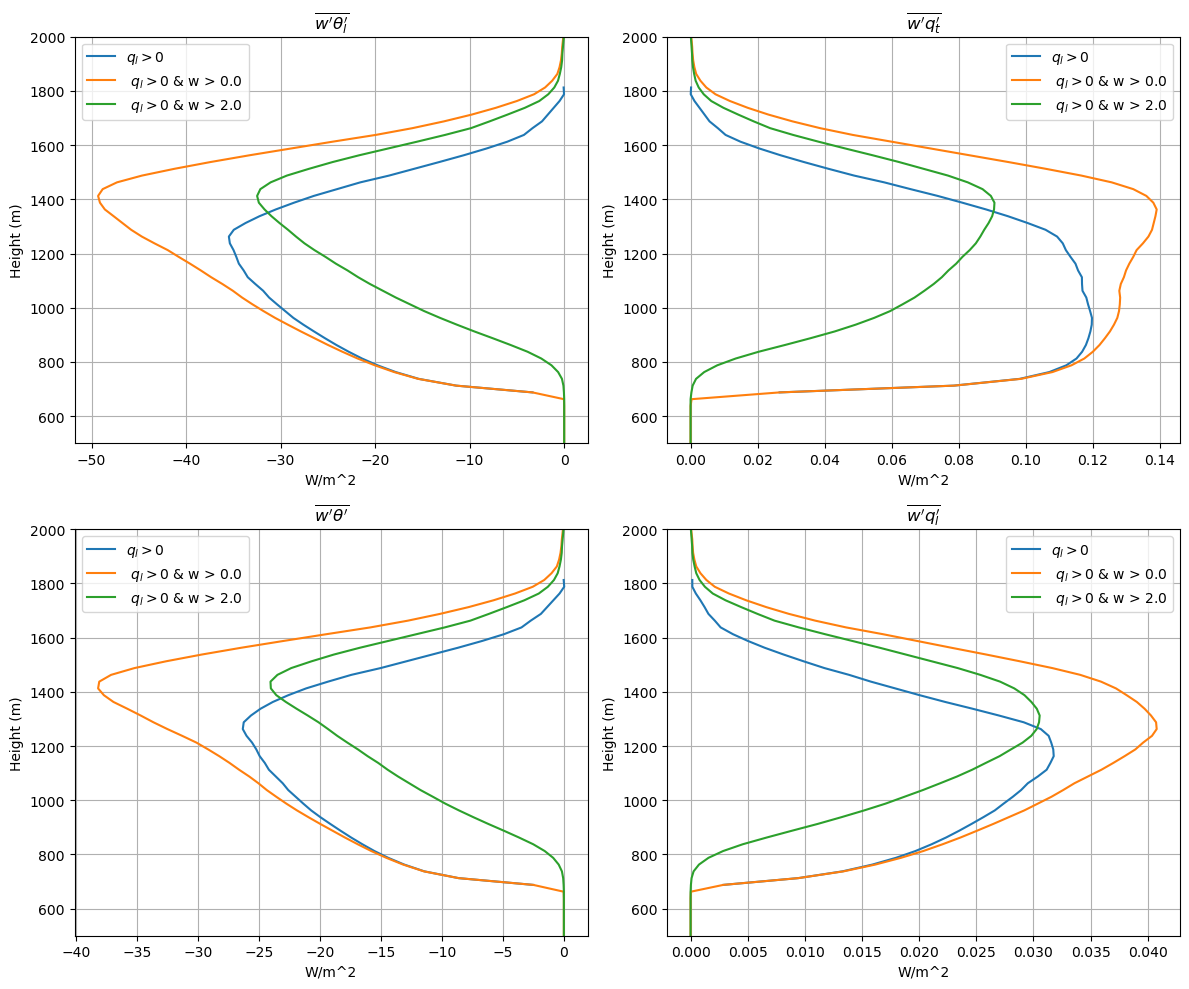

In [49]:
# import numpy as np
# import netCDF4 as nc
# import matplotlib.pyplot as plt

# # Constants
# rho_0 = 1.25  # kg/m^3
# L_v = 2.5e6   # J/kg
# c_p = 1004.0  # J/kg/K
# R_d = 287.05  # J/kg/K gas constant for dry air
# R_v = 461.51  # J/kg/K gas constant for water vapor
# p_0 = 100000.0  # Pa standard pressure at sea level
# c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
# c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
# rho_l = 1000.0  # kg/m^3 density of water
# epsilon = R_d / R_v
# kappa = R_d / c_p

# # Thresholds
# liquid_water_threshold = 0.0000001
# vertical_velocity_thresholds = [0.0, 2.0]

# # File paths
# w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
# l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
# q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
# t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
# p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

# def load_data_all_levels(filename, var_name, timestep, scale_factor=1.0):
#     with nc.Dataset(filename) as ds:
#         data = ds[var_name][timestep, :, :, :] * scale_factor  # Extract all levels for the timestep and apply scale factor
#     return data

# def load_zt_values(filename):
#     with nc.Dataset(filename) as ds:
#         zt_values = ds['zt'][:]
#     return zt_values

# def calculate_temperature(theta_l, p, q_t, q_l, q_v):
#     """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
#     kappa = (R_d / c_pd) * ((1 + q_v / epsilon) / (1 + q_v * (c_pv / c_pd)))
#     T = theta_l * (c_pd / (c_pd - L_v * q_l)) * (p_0 / p) ** (-kappa)
#     return T

# def calculate_theta(T, p):
#     """Calculate potential temperature theta from temperature and pressure."""
#     return T * (p_0 / p) ** kappa

# def calculate_M_c_values(w_data, l_data, variable_data, liquid_water_threshold, vertical_velocity_thresholds, multiplier):
#     M_c_values = []
#     M_c_values_w_thresholds = {threshold: [] for threshold in vertical_velocity_thresholds}
#     M_c_values_w_neg_threshold = []

#     for z in range(w_data.shape[0]):
#         # Cloudy and environment masks
#         cloudy_mask = l_data[z, :, :] > liquid_water_threshold
#         environment_mask = ~cloudy_mask

#         # Area fractions
#         a = np.mean(cloudy_mask)

#         # Mean vertical velocities
#         w_c = np.mean(w_data[z, :, :][cloudy_mask])
#         w_e = np.mean(w_data[z, :, :][environment_mask])

#         # Mean variable contents
#         var_c = np.mean(variable_data[z, :, :][cloudy_mask])
#         var_e = np.mean(variable_data[z, :, :][environment_mask])

#         # Calculate M_c
#         M_c = a * (1 - a) * (w_c - w_e)

#         # Multiply M_c with (var_c - var_e) and the multiplier
#         result = M_c * (var_c - var_e) * multiplier

#         # Append the result for the current vertical level
#         M_c_values.append(result)

#         # Calculate for each vertical velocity threshold
#         for threshold in vertical_velocity_thresholds:
#             mask = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] > threshold)
#             if np.any(mask):
#                 a_thresh = np.mean(mask)
#                 w_c_thresh = np.mean(w_data[z, :, :][mask])
#                 w_e_thresh = np.mean(w_data[z, :, :][~mask])
#                 var_c_thresh = np.mean(variable_data[z, :, :][mask])
#                 var_e_thresh = np.mean(variable_data[z, :, :][~mask])
#                 M_c_thresh = a_thresh * (1 - a_thresh) * (w_c_thresh - w_e_thresh)
#                 result_thresh = M_c_thresh * (var_c_thresh - var_e_thresh) * multiplier
#             else:
#                 result_thresh = 0
#             M_c_values_w_thresholds[threshold].append(result_thresh)

#         # Calculate for w < 0 threshold
#         mask_neg = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] < 0)
#         if np.any(mask_neg):
#             a_neg = np.mean(mask_neg)
#             w_c_neg = np.mean(w_data[z, :, :][mask_neg])
#             w_e_neg = np.mean(w_data[z, :, :][~mask_neg])
#             var_c_neg = np.mean(variable_data[z, :, :][mask_neg])
#             var_e_neg = np.mean(variable_data[z, :, :][~mask_neg])
#             M_c_neg = a_neg * (1 - a_neg) * (w_c_neg - w_e_neg)
#             result_neg = M_c_neg * (var_c_neg - var_e_neg) * multiplier
#         else:
#             result_neg = 0
#         M_c_values_w_neg_threshold.append(result_neg)

#     # Convert the result lists to numpy arrays
#     M_c_values = np.array(M_c_values)
#     for threshold in vertical_velocity_thresholds:
#         M_c_values_w_thresholds[threshold] = np.array(M_c_values_w_thresholds[threshold])
#     M_c_values_w_neg_threshold = np.array(M_c_values_w_neg_threshold)

#     return M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold

# def average_M_c_values_over_time(start_timestep, end_timestep, variable_data_loader, multiplier):
#     M_c_values_total = None
#     M_c_values_w_thresholds_total = {threshold: None for threshold in vertical_velocity_thresholds}
#     M_c_values_w_neg_threshold_total = None

#     for timestep in range(start_timestep, end_timestep):
#         w_data = load_data_all_levels(w_file, 'w', timestep)
#         l_data = load_data_all_levels(l_file, 'l', timestep, scale_factor=1/1000)
#         variable_data = variable_data_loader(timestep)

#         M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold = calculate_M_c_values(
#             w_data, l_data, variable_data, liquid_water_threshold, vertical_velocity_thresholds, multiplier
#         )

#         if M_c_values_total is None:
#             M_c_values_total = M_c_values
#             M_c_values_w_neg_threshold_total = M_c_values_w_neg_threshold
#             for threshold in vertical_velocity_thresholds:
#                 M_c_values_w_thresholds_total[threshold] = M_c_values_w_thresholds[threshold]
#         else:
#             M_c_values_total += M_c_values
#             M_c_values_w_neg_threshold_total += M_c_values_w_neg_threshold
#             for threshold in vertical_velocity_thresholds:
#                 M_c_values_w_thresholds_total[threshold] += M_c_values_w_thresholds[threshold]

#     num_timesteps = end_timestep - start_timestep
#     M_c_values_total /= num_timesteps
#     M_c_values_w_neg_threshold_total /= num_timesteps
#     for threshold in vertical_velocity_thresholds:
#         M_c_values_w_thresholds_total[threshold] /= num_timesteps

#     return M_c_values_total, M_c_values_w_thresholds_total, M_c_values_w_neg_threshold_total

# def plot_M_c_values(ax, M_c_values, M_c_values_w_thresholds, title):
#     ax.plot(M_c_values, zt_values, label='$q_l >0$')
#     for threshold in vertical_velocity_thresholds:
#         ax.plot(M_c_values_w_thresholds[threshold], zt_values, label=f' $q_l>0$ & w > {threshold}')
#     #ax.plot(M_c_values_w_neg_threshold, zt_values, label='$q_l > 0$ & w < 0')

#     ax.set_xlabel('W/m^2')
#     ax.set_ylabel('Height (m)')
#     ax.set_title(title)
#     ax.grid(True)
#     ax.set_ylim([500, 2000])
#     ax.legend()

# # Specify the time range to analyze (e.g., timesteps 15 to 35)
# start_timestep = 15
# end_timestep = 25

# # Load height values
# zt_values = load_zt_values(l_file)

# # Calculate and average M_c values for liquid water content
# M_c_l_values, M_c_l_values_w_thresholds, M_c_l_values_w_neg_threshold = average_M_c_values_over_time(
#     start_timestep, end_timestep, lambda timestep: load_data_all_levels(l_file, 'l', timestep, scale_factor=1/1000), rho_0 * L_v)

# # Calculate and average M_c values for total water content
# M_c_qt_values, M_c_qt_values_w_thresholds, M_c_qt_values_w_neg_threshold = average_M_c_values_over_time(
#     start_timestep, end_timestep, lambda timestep: load_data_all_levels(q_file, 'q', timestep, scale_factor=1/1000), rho_0 * L_v)

# # Calculate and average M_c values for liquid water potential temperature
# M_c_theta_l_values, M_c_theta_l_values_w_thresholds, M_c_theta_l_values_w_neg_threshold = average_M_c_values_over_time(
#     start_timestep, end_timestep, lambda timestep: load_data_all_levels(t_file, 't', timestep), rho_0 * c_p)

# # Calculate and average M_c values for theta
# def variable_data_loader_theta(timestep):
#     t_data = load_data_all_levels(t_file, 't', timestep)
#     p_data = load_data_all_levels(p_file, 'p', timestep)
#     q_data = load_data_all_levels(q_file, 'q', timestep, scale_factor=1/1000)
#     l_data = load_data_all_levels(l_file, 'l', timestep, scale_factor=1/1000)
#     q_v_data = (q_data - l_data)
    
#     # Calculate temperature
#     T = calculate_temperature(t_data, p_data, q_data, l_data, q_v_data)
    
#     # Calculate theta
#     theta = calculate_theta(T, p_data)
#     return theta

# M_c_theta_values, M_c_theta_values_w_thresholds, M_c_theta_values_w_neg_threshold = average_M_c_values_over_time(
#     start_timestep, end_timestep, variable_data_loader_theta, rho_0 * c_p)

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# plot_M_c_values(ax1, M_c_theta_l_values, M_c_theta_l_values_w_thresholds,  r'$\overline{w^{\prime}\theta_l^{\prime}}$')
# plot_M_c_values(ax2, M_c_qt_values, M_c_qt_values_w_thresholds,  r'$\overline{w^{\prime}q_t^{\prime}}$')
# plot_M_c_values(ax3, M_c_theta_values, M_c_theta_values_w_thresholds, r'$\overline{w^{\prime}\theta^{\prime}}$')
# plot_M_c_values(ax4, M_c_l_values, M_c_l_values_w_thresholds, r'$\overline{w^{\prime}q_l^{\prime}}$')

# plt.tight_layout()
# plt.show()


Checking for fractions a, top down view. 

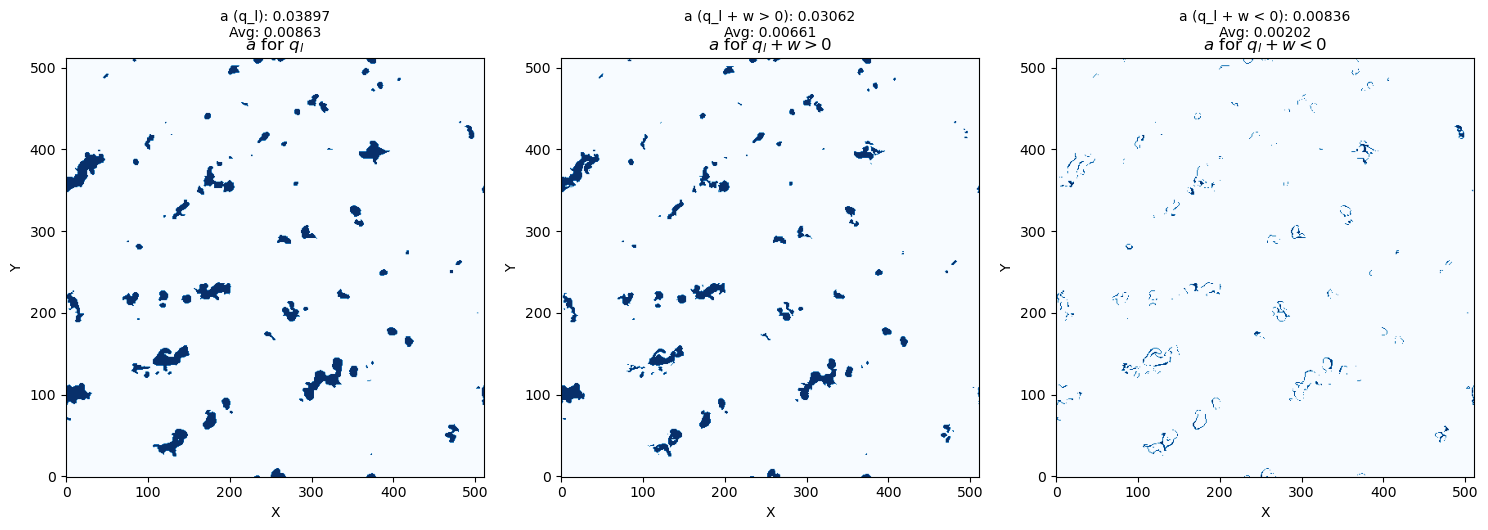

In [12]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Thresholds
liquid_water_threshold = 0.0000001

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
    return data

def calculate_area_fractions(w_data, l_data, liquid_water_threshold):
    a_cloudy_total = []
    a_cloudy_w_pos_total = []
    a_cloudy_w_neg_total = []

    for z in range(w_data.shape[0]):
        # Cloudy masks
        cloudy_mask = l_data[z, :, :] > liquid_water_threshold
        cloudy_w_pos_mask = cloudy_mask & (w_data[z, :, :] > 0)
        cloudy_w_neg_mask = cloudy_mask & (w_data[z, :, :] < 0)

        a_cloudy_total.append(np.mean(cloudy_mask))
        a_cloudy_w_pos_total.append(np.mean(cloudy_w_pos_mask))
        a_cloudy_w_neg_total.append(np.mean(cloudy_w_neg_mask))

    # Calculate averages over all levels
    a_cloudy_avg = np.mean(a_cloudy_total)
    a_cloudy_w_pos_avg = np.mean(a_cloudy_w_pos_total)
    a_cloudy_w_neg_avg = np.mean(a_cloudy_w_neg_total)

    return a_cloudy_total, a_cloudy_w_pos_total, a_cloudy_w_neg_total, a_cloudy_avg, a_cloudy_w_pos_avg, a_cloudy_w_neg_avg

# Specify the timestep and height level to analyze
timestep = 15
height_level = 40  # Change this to your desired height level

# Load data for the specified timestep
w_data = load_data_all_levels(w_file, 'w', timestep)
l_data = load_data_all_levels(l_file, 'l', timestep)

# Extract data for the specified height level
w_data_height = w_data[height_level, :, :]
l_data_height = l_data[height_level, :, :]

# Calculate area fractions for the specified height level
cloudy_mask = l_data_height > liquid_water_threshold
cloudy_w_pos_mask = cloudy_mask & (w_data_height > 0)
cloudy_w_neg_mask = cloudy_mask & (w_data_height < 0)

a_cloudy = np.mean(cloudy_mask)
a_cloudy_w_pos = np.mean(cloudy_w_pos_mask)
a_cloudy_w_neg = np.mean(cloudy_w_neg_mask)

# Calculate area fractions averaged over all levels
a_cloudy_total, a_cloudy_w_pos_total, a_cloudy_w_neg_total, a_cloudy_avg, a_cloudy_w_pos_avg, a_cloudy_w_neg_avg = calculate_area_fractions(
    w_data, l_data, liquid_water_threshold
)

# Create plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot fraction for q_l
ax1.imshow(cloudy_mask, cmap='Blues', origin='lower')
ax1.set_title(r'$a$ for $q_l$')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.text(0.5, 1.05, f'a (q_l): {a_cloudy:.5f}\nAvg: {a_cloudy_avg:.5f}', transform=ax1.transAxes, ha='center')

# Plot fraction for q_l + w > 0
ax2.imshow(cloudy_w_pos_mask, cmap='Blues', origin='lower')
ax2.set_title(r'$a$ for $q_l + w > 0$')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.text(0.5, 1.05, f'a (q_l + w > 0): {a_cloudy_w_pos:.5f}\nAvg: {a_cloudy_w_pos_avg:.5f}', transform=ax2.transAxes, ha='center')

# Plot fraction for q_l + w < 0
ax3.imshow(cloudy_w_neg_mask, cmap='Blues', origin='lower')
ax3.set_title(r'$a$ for $q_l + w < 0$')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.text(0.5, 1.05, f'a (q_l + w < 0): {a_cloudy_w_neg:.5f}\nAvg: {a_cloudy_w_neg_avg:.5f}', transform=ax3.transAxes, ha='center')

plt.tight_layout()
plt.show()


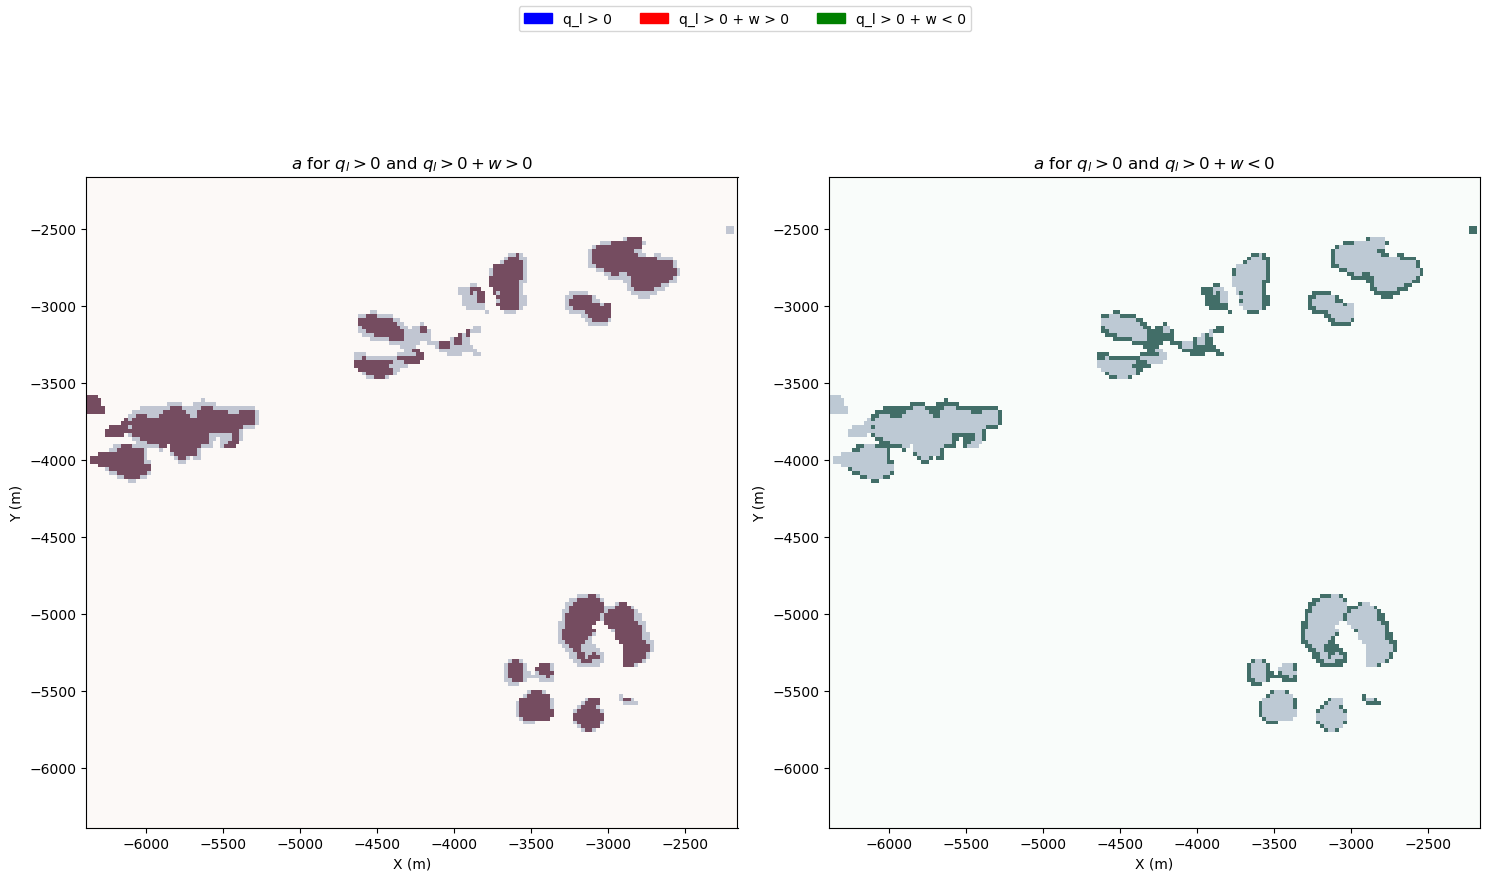

In [26]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Thresholds
liquid_water_threshold = 0.0000001

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        x = ds.variables['xt'][:]
        y = ds.variables['yt'][:]
    return data, x, y

def calculate_area_fractions(w_data, l_data, liquid_water_threshold):
    a_cloudy_total = []
    a_cloudy_w_pos_total = []
    a_cloudy_w_neg_total = []

    for z in range(w_data.shape[0]):
        # Cloudy masks
        cloudy_mask = l_data[z, :, :] > liquid_water_threshold
        cloudy_w_pos_mask = cloudy_mask & (w_data[z, :, :] > 0)
        cloudy_w_neg_mask = cloudy_mask & (w_data[z, :, :] < 0)

        a_cloudy_total.append(np.mean(cloudy_mask))
        a_cloudy_w_pos_total.append(np.mean(cloudy_w_pos_mask))
        a_cloudy_w_neg_total.append(np.mean(cloudy_w_neg_mask))

    # Calculate averages over all levels
    a_cloudy_avg = np.mean(a_cloudy_total)
    a_cloudy_w_pos_avg = np.mean(a_cloudy_w_pos_total)
    a_cloudy_w_neg_avg = np.mean(a_cloudy_w_neg_total)

    return a_cloudy_total, a_cloudy_w_pos_total, a_cloudy_w_neg_total, a_cloudy_avg, a_cloudy_w_pos_avg, a_cloudy_w_neg_avg

# Specify the timestep and height level to analyze
timestep = 15
height_level = 50  # Change this to your desired height level

# Load data for the specified timestep
w_data, x, y = load_data_all_levels(w_file, 'w', timestep)
l_data, _, _ = load_data_all_levels(l_file, 'l', timestep)

# Extract data for the specified height level
w_data_height = w_data[height_level, :, :]
l_data_height = l_data[height_level, :, :]

# Calculate area fractions for the specified height level
cloudy_mask = l_data_height > liquid_water_threshold
cloudy_w_pos_mask = cloudy_mask & (w_data_height > 0)
cloudy_w_neg_mask = cloudy_mask & (w_data_height < 0)

# Get a quarter of the field
quarter_x = x[:x.shape[0]//3]
quarter_y = y[:y.shape[0]//3]
quarter_cloudy_mask = cloudy_mask[:cloudy_mask.shape[0]//3, :cloudy_mask.shape[1]//3]
quarter_cloudy_w_pos_mask = cloudy_w_pos_mask[:cloudy_w_pos_mask.shape[0]//3, :cloudy_w_pos_mask.shape[1]//3]
quarter_cloudy_w_neg_mask = cloudy_w_neg_mask[:cloudy_w_neg_mask.shape[0]//3, :cloudy_w_neg_mask.shape[1]//3]

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10), facecolor='white')

# Left plot: q_l > 0 and q_l > 0 + w > 0
ax1.imshow(quarter_cloudy_mask, cmap='Blues', origin='lower', alpha=0.5, extent=[quarter_x.min(), quarter_x.max(), quarter_y.min(), quarter_y.max()])
ax1.imshow(quarter_cloudy_w_pos_mask, cmap='Reds', origin='lower', alpha=0.5, extent=[quarter_x.min(), quarter_x.max(), quarter_y.min(), quarter_y.max()])
ax1.set_title(r'$a$ for $q_l > 0$ and $q_l > 0 + w > 0$')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')

# Right plot: q_l > 0 and q_l > 0 + w < 0
ax2.imshow(quarter_cloudy_mask, cmap='Blues', origin='lower', alpha=0.5, extent=[quarter_x.min(), quarter_x.max(), quarter_y.min(), quarter_y.max()])
ax2.imshow(quarter_cloudy_w_neg_mask, cmap='Greens', origin='lower', alpha=0.5, extent=[quarter_x.min(), quarter_x.max(), quarter_y.min(), quarter_y.max()])
ax2.set_title(r'$a$ for $q_l > 0$ and $q_l > 0 + w < 0$')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')

# Add a legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', edgecolor='blue', label='q_l > 0'),
    Patch(facecolor='red', edgecolor='red', label='q_l > 0 + w > 0'),
    Patch(facecolor='green', edgecolor='green', label='q_l > 0 + w < 0')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=3)

plt.tight_layout()
plt.show()


## Adding total flux

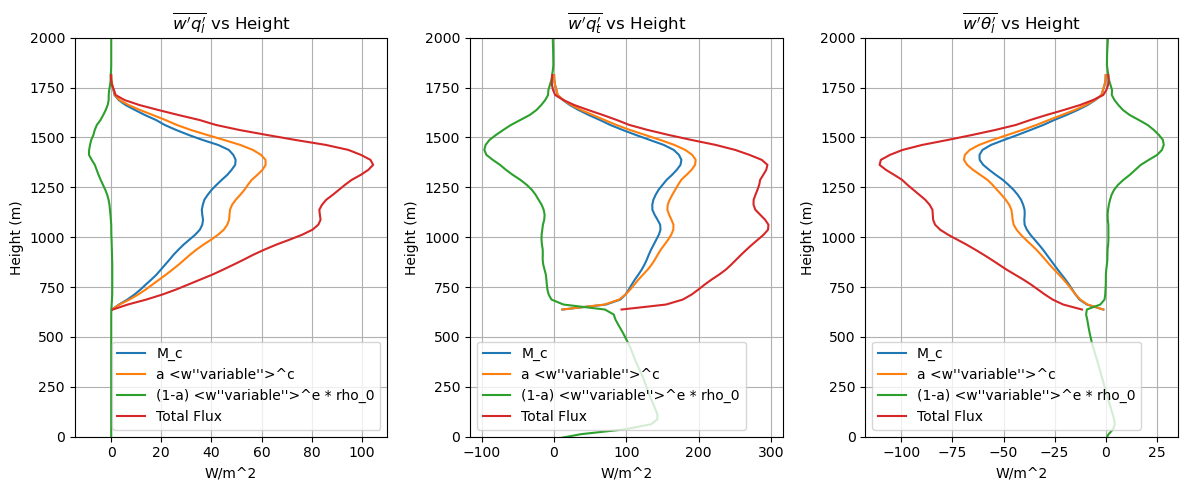

In [49]:
# import numpy as np
# import netCDF4 as nc
# import matplotlib.pyplot as plt

# # Thresholds
# liquid_water_threshold = 0.00001
# vertical_velocity_threshold = 0.0

# # Constants
# rho_0 = 1.25  # kg/m^3
# L_v = 2.5e6   # J/kg
# c_p = 1004.0  # J/kg/K

# # File paths
# w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
# l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
# q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
# t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'

# def load_data_all_levels(filename, var_name, timestep):
#     with nc.Dataset(filename) as ds:
#         data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
#     return data

# def load_zt_values(filename):
#     with nc.Dataset(filename) as ds:
#         zt_values = ds['zt'][:]
#     return zt_values

# def calculate_M_c_values(w_data, l_data, variable_data, liquid_water_threshold, vertical_velocity_threshold, multiplier):
#     M_c_values = []
#     active_cloudy_values = []
#     environment_values = []
#     total_flux_values = []

#     for z in range(w_data.shape[0]):
#         # Cloudy and environment masks
#         cloudy_mask = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] > vertical_velocity_threshold)
#         environment_mask = ~cloudy_mask

#         # Area fractions
#         a = np.mean(cloudy_mask)

#         # Mean vertical velocities and variable contents
#         w_mean = np.mean(w_data[z, :, :])
#         var_mean = np.mean(variable_data[z, :, :])
        
#         w_c = np.mean(w_data[z, :, :][cloudy_mask])
#         w_e = np.mean(w_data[z, :, :][environment_mask])

#         var_c = np.mean(variable_data[z, :, :][cloudy_mask])
#         var_e = np.mean(variable_data[z, :, :][environment_mask])

#         # Perturbations (variable minus its mean)
#         w_prime_c = w_data[z, :, :][cloudy_mask] - w_mean
#         w_prime_e = w_data[z, :, :][environment_mask] - w_mean

#         var_prime_c = variable_data[z, :, :][cloudy_mask] - var_mean
#         var_prime_e = variable_data[z, :, :][environment_mask] - var_mean

#         # Calculate a * <w''variable''>^c
#         line1 = a * np.mean(w_prime_c * var_prime_c) * multiplier
#         # Calculate (1 - a) * <w''variable''>^e * rho_0
#         line2 = (1 - a) * np.mean(w_prime_e * var_prime_e) * multiplier

#         # Calculate M_c
#         M_c = a * (1 - a) * (w_c - w_e)
#         # Multiply M_c with (var_c - var_e)
#         result = M_c * (var_c - var_e) * multiplier

#         # Append the result for the current vertical level
#         M_c_values.append(result)
#         active_cloudy_values.append(line1)
#         environment_values.append(line2)
#         total_flux_values.append(result + line1 + line2)

#     # Convert the result lists to numpy arrays
#     M_c_values = np.array(M_c_values)
#     active_cloudy_values = np.array(active_cloudy_values)
#     environment_values = np.array(environment_values)
#     total_flux_values = np.array(total_flux_values)

#     return M_c_values, active_cloudy_values, environment_values, total_flux_values

# # Specify the timestep to analyze
# specified_timestep = 30

# # Load data for the specified timestep
# w_data = load_data_all_levels(w_file, 'w', specified_timestep)
# l_data = load_data_all_levels(l_file, 'l', specified_timestep)
# q_l_data = load_data_all_levels(q_file, 'q', specified_timestep)
# theta_l_data = load_data_all_levels(t_file, 't', specified_timestep)
# zt_values = load_zt_values(l_file)

# # Calculate M_c values for liquid water content
# M_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values = calculate_M_c_values(
#     w_data, l_data, l_data, liquid_water_threshold, vertical_velocity_threshold, rho_0 * L_v)

# # Calculate M_c values for total water content
# M_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values = calculate_M_c_values(
#     w_data, l_data, q_l_data, liquid_water_threshold, vertical_velocity_threshold, rho_0 * L_v)

# # Calculate M_c values for liquid water potential temperature
# M_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values = calculate_M_c_values(
#     w_data, l_data, theta_l_data, liquid_water_threshold, vertical_velocity_threshold, rho_0 * c_p)

# # Plotting
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# def plot_with_additional_lines(ax, M_c_values, active_cloudy_values, environment_values, total_flux_values, title):
#     ax.plot(M_c_values, zt_values, label='M_c')
#     ax.plot(active_cloudy_values, zt_values, label='a <w\'\'variable\'\'>^c')
#     ax.plot(environment_values, zt_values, label='(1-a) <w\'\'variable\'\'>^e * rho_0')
#     ax.plot(total_flux_values, zt_values, label='Total Flux')

#     ax.set_xlabel('W/m^2')
#     ax.set_ylabel('Height (m)')
#     ax.set_title(title)
#     ax.grid(True)
#     ax.set_ylim([0, 2000])
#     ax.legend()

# plot_with_additional_lines(ax1, M_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values, r'$\overline{w^{\prime}q_l^{\prime}}$ vs Height')
# plot_with_additional_lines(ax2, M_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values, r'$\overline{w^{\prime}q_t^{\prime}}$ vs Height')
# plot_with_additional_lines(ax3, M_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values, r'$\overline{w^{\prime}\theta_l^{\prime}}$ vs Height')

# plt.tight_layout()
# plt.show()


## Average over time

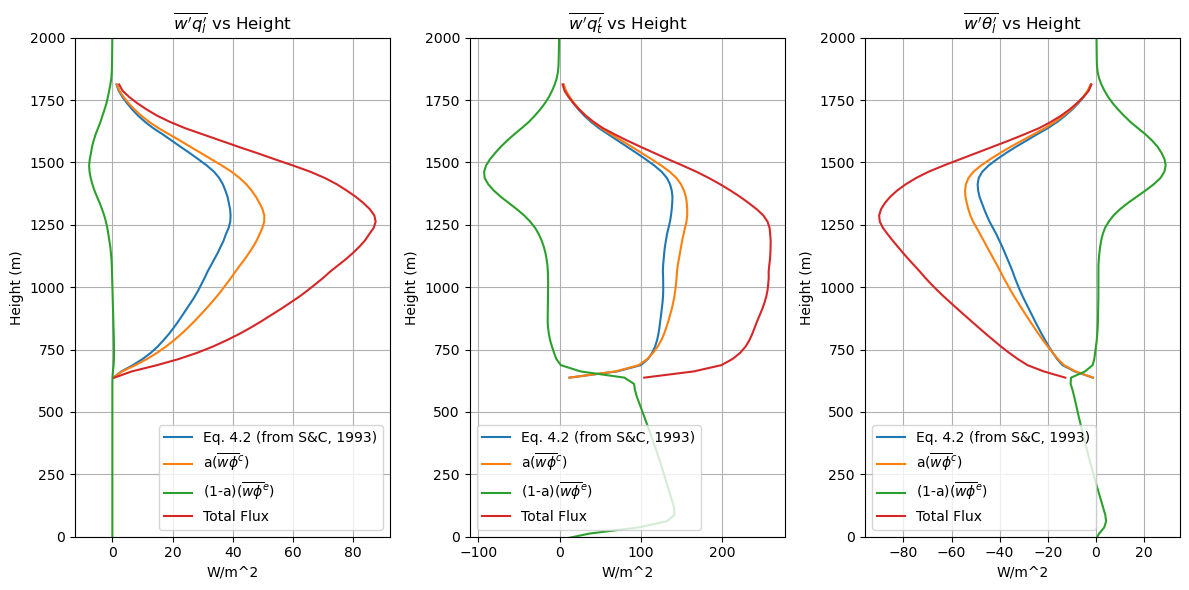

In [56]:
# import numpy as np
# import netCDF4 as nc
# import matplotlib.pyplot as plt

# # Thresholds
# liquid_water_threshold = 0.00001
# vertical_velocity_threshold = 0.0

# # Constants
# rho_0 = 1.25  # kg/m^3
# L_v = 2.5e6   # J/kg
# c_p = 1004.0  # J/kg/K

# # File paths
# w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
# l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
# q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
# t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'

# def load_data_all_levels(filename, var_name, timestep):
#     with nc.Dataset(filename) as ds:
#         data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
#     return data

# def load_zt_values(filename):
#     with nc.Dataset(filename) as ds:
#         zt_values = ds['zt'][:]
#     return zt_values

# def calculate_M_c_values(w_data, l_data, variable_data, liquid_water_threshold, vertical_velocity_threshold, multiplier):
#     M_c_values = []
#     active_cloudy_values = []
#     environment_values = []
#     total_flux_values = []

#     for z in range(w_data.shape[0]):
#         # Cloudy and environment masks
#         cloudy_mask = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] > vertical_velocity_threshold)
#         environment_mask = ~cloudy_mask

#         # Area fractions
#         a = np.mean(cloudy_mask)

#         # Mean vertical velocities and variable contents
#         w_mean = np.mean(w_data[z, :, :])
#         var_mean = np.mean(variable_data[z, :, :])
        
#         w_c = np.mean(w_data[z, :, :][cloudy_mask])
#         w_e = np.mean(w_data[z, :, :][environment_mask])

#         var_c = np.mean(variable_data[z, :, :][cloudy_mask])
#         var_e = np.mean(variable_data[z, :, :][environment_mask])

#         # Perturbations (variable minus its mean)
#         w_prime_c = np.nan_to_num(w_data[z, :, :][cloudy_mask] - w_mean)
#         w_prime_e = np.nan_to_num(w_data[z, :, :][environment_mask] - w_mean)

#         var_prime_c = np.nan_to_num(variable_data[z, :, :][cloudy_mask] - var_mean)
#         var_prime_e = np.nan_to_num(variable_data[z, :, :][environment_mask] - var_mean)

#         # Calculate a * <w''variable''>^c
#         line1 = a * np.mean(w_prime_c * var_prime_c) * multiplier
#         # Calculate (1 - a) * <w''variable''>^e * rho_0
#         line2 = (1 - a) * np.mean(w_prime_e * var_prime_e) * multiplier

#         # Calculate M_c
#         M_c = a * (1 - a) * (w_c - w_e)
#         # Multiply M_c with (var_c - var_e)
#         result = M_c * (var_c - var_e) * multiplier

#         # Append the result for the current vertical level
#         M_c_values.append(result)
#         active_cloudy_values.append(line1)
#         environment_values.append(line2)
#         total_flux_values.append(result + line1 + line2)

#     # Convert the result lists to numpy arrays
#     M_c_values = np.array(M_c_values)
#     active_cloudy_values = np.array(active_cloudy_values)
#     environment_values = np.array(environment_values)
#     total_flux_values = np.array(total_flux_values)

#     return M_c_values, active_cloudy_values, environment_values, total_flux_values

# def average_M_c_values_over_time(start_timestep, end_timestep, variable_data_loader, multiplier):
#     M_c_values_total = None
#     active_cloudy_values_total = None
#     environment_values_total = None
#     total_flux_values_total = None

#     num_timesteps = end_timestep - start_timestep

#     for timestep in range(start_timestep, end_timestep):
#         w_data = load_data_all_levels(w_file, 'w', timestep)
#         l_data = load_data_all_levels(l_file, 'l', timestep)
#         variable_data = variable_data_loader(timestep)

#         M_c_values, active_cloudy_values, environment_values, total_flux_values = calculate_M_c_values(
#             w_data, l_data, variable_data, liquid_water_threshold, vertical_velocity_threshold, multiplier
#         )

#         if M_c_values_total is None:
#             M_c_values_total = M_c_values
#             active_cloudy_values_total = active_cloudy_values
#             environment_values_total = environment_values
#             total_flux_values_total = total_flux_values
#         else:
#             M_c_values_total += M_c_values
#             active_cloudy_values_total += active_cloudy_values
#             environment_values_total += environment_values
#             total_flux_values_total += total_flux_values

#     M_c_values_total /= num_timesteps
#     active_cloudy_values_total /= num_timesteps
#     environment_values_total /= num_timesteps
#     total_flux_values_total /= num_timesteps

#     return M_c_values_total, active_cloudy_values_total, environment_values_total, total_flux_values_total

# # Specify the time range to analyze (e.g., timesteps 15 to 25)
# start_timestep = 15
# end_timestep = 25

# # Load height values
# zt_values = load_zt_values(l_file)

# # Calculate and average M_c values for liquid water content
# M_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values = average_M_c_values_over_time(
#     start_timestep, end_timestep, lambda timestep: load_data_all_levels(l_file, 'l', timestep), rho_0 * L_v)

# # Calculate and average M_c values for total water content
# M_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values = average_M_c_values_over_time(
#     start_timestep, end_timestep, lambda timestep: load_data_all_levels(q_file, 'q', timestep), rho_0 * L_v)

# # Calculate and average M_c values for liquid water potential temperature
# M_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values = average_M_c_values_over_time(
#     start_timestep, end_timestep, lambda timestep: load_data_all_levels(t_file, 't', timestep), rho_0 * c_p)

# # Plotting
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# def plot_with_additional_lines(ax, M_c_values, active_cloudy_values, environment_values, total_flux_values, title):
#     ax.plot(M_c_values, zt_values, label='Eq 4.2 (S&C, 1993)')
#     ax.plot(active_cloudy_values, zt_values, label='a($\overline{w''\phi''}^c$)')
#     ax.plot(environment_values, zt_values, label='(1-a)($\overline{w''\phi''}^e$)')
#     ax.plot(total_flux_values, zt_values, label='Total Flux')

#     ax.set_xlabel('W/m^2')
#     ax.set_ylabel('Height (m)')
#     ax.set_title(title)
#     ax.grid(True)
#     ax.set_ylim([0, 2000])
#     ax.legend()

# plot_with_additional_lines(ax1, M_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values, r'$\overline{w^{\prime}q_l^{\prime}}$')
# plot_with_additional_lines(ax2, M_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values, r'$\overline{w^{\prime}q_t^{\prime}}$')
# plot_with_additional_lines(ax3, M_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values, r'$\overline{w^{\prime}\theta_l^{\prime}}$')

# plt.tight_layout()
# plt.show()


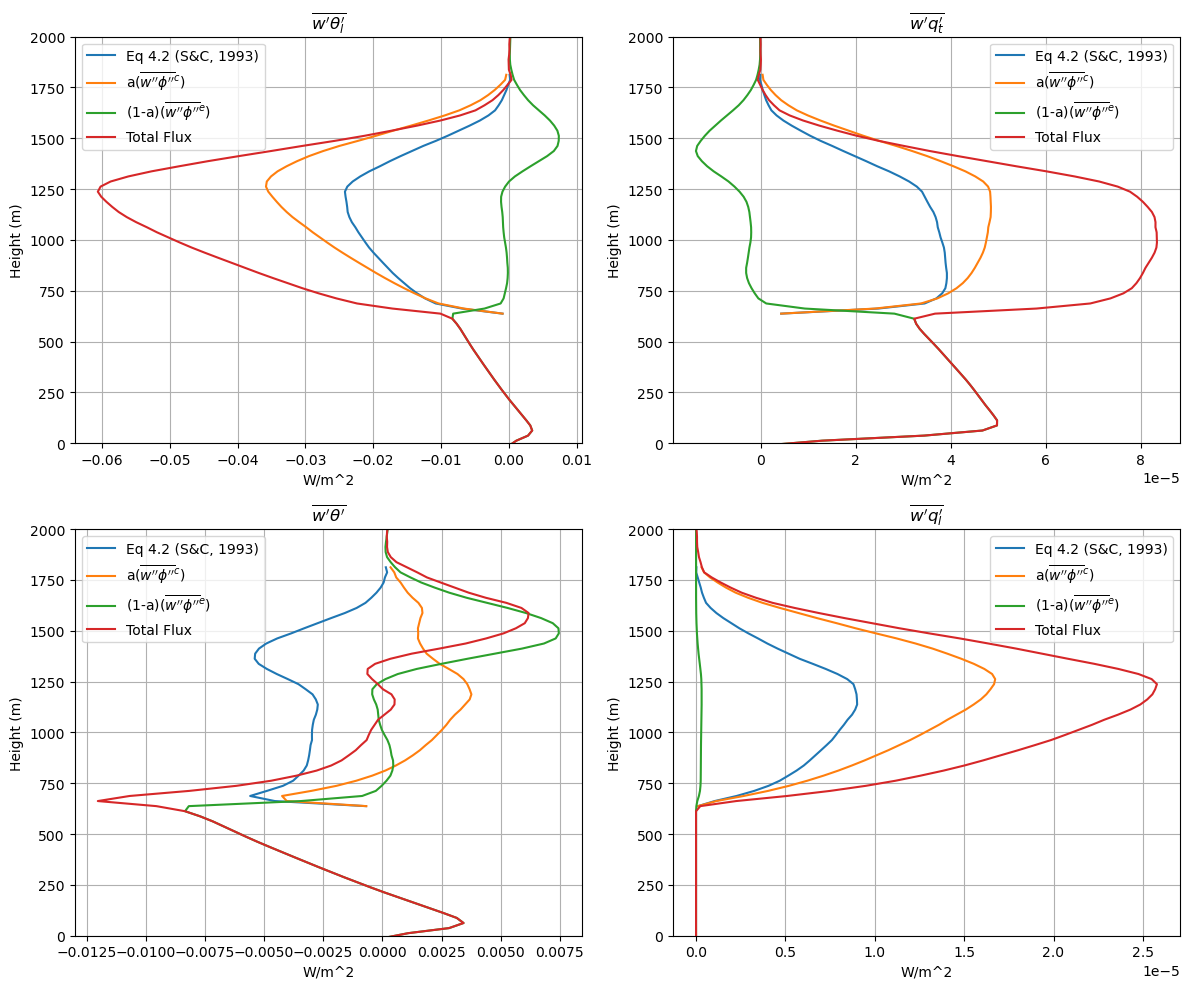

In [3]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Thresholds
liquid_water_threshold = 0.00001

# Constants
rho_0 = 1.25       # kg/m^3
L_v = 2268000.0    # J/kg latent heat of vaporization
c_p = 1004.0       # J/kg/K specific heat capacity at constant pressure
R_d = 287.05       # J/kg/K gas constant for dry air
p_0 = 100000.0     # Pa standard pressure at sea level

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :].astype(np.float64)  # Extract all levels for the timestep
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def calculate_theta(theta_l_data, l_data, p_data):
    exner = (p_data / p_0) ** (R_d / c_p)
    T = theta_l_data * exner + (L_v * l_data) / c_p
    theta = T / exner
    return theta

def calculate_M_c_values(w_data, l_data, variable_data, liquid_water_threshold, multiplier):
    M_c_values = []
    active_cloudy_values = []
    environment_values = []
    total_flux_values = []

    for z in range(w_data.shape[0]):
        # Cloudy and environment masks
        cloudy_mask = l_data[z, :, :] > liquid_water_threshold
        environment_mask = ~cloudy_mask

        # Area fractions
        a = np.mean(cloudy_mask)

        # Mean vertical velocities and variable contents
        w_mean = np.mean(w_data[z, :, :])
        var_mean = np.mean(variable_data[z, :, :])

        # Check for empty masks to avoid errors
        if np.any(cloudy_mask):
            w_c = np.mean(w_data[z, :, :][cloudy_mask])
            var_c = np.mean(variable_data[z, :, :][cloudy_mask])
            w_prime_c = w_data[z, :, :][cloudy_mask] - w_mean
            var_prime_c = variable_data[z, :, :][cloudy_mask] - var_mean
            line1 = a * np.mean(w_prime_c * var_prime_c) * multiplier
        else:
            w_c = np.nan
            var_c = np.nan
            line1 = np.nan

        if np.any(environment_mask):
            w_e = np.mean(w_data[z, :, :][environment_mask])
            var_e = np.mean(variable_data[z, :, :][environment_mask])
            w_prime_e = w_data[z, :, :][environment_mask] - w_mean
            var_prime_e = variable_data[z, :, :][environment_mask] - var_mean
            line2 = (1 - a) * np.mean(w_prime_e * var_prime_e) * multiplier
        else:
            w_e = np.nan
            var_e = np.nan
            line2 = np.nan

        # Calculate M_c
        if not np.isnan(w_c) and not np.isnan(w_e) and not np.isnan(var_c) and not np.isnan(var_e):
            M_c = a * (1 - a) * (w_c - w_e)
            result = M_c * (var_c - var_e) * multiplier
        else:
            result = np.nan

        # Append the result for the current vertical level
        M_c_values.append(result)
        active_cloudy_values.append(line1)
        environment_values.append(line2)

        # Calculate total flux using np.nansum to handle NaNs
        total_flux = np.nansum([result, line1, line2])
        total_flux_values.append(total_flux)

    # Convert the result lists to numpy arrays
    M_c_values = np.array(M_c_values)
    active_cloudy_values = np.array(active_cloudy_values)
    environment_values = np.array(environment_values)
    total_flux_values = np.array(total_flux_values)

    return M_c_values, active_cloudy_values, environment_values, total_flux_values

def average_M_c_values_over_time(start_timestep, end_timestep, variable_data_loader, multiplier):
    M_c_values_total = None
    active_cloudy_values_total = None
    environment_values_total = None
    total_flux_values_total = None

    num_timesteps = end_timestep - start_timestep

    for timestep in range(start_timestep, end_timestep):
        w_data = load_data_all_levels(w_file, 'w', timestep)
        l_data = load_data_all_levels(l_file, 'l', timestep)
        variable_data = variable_data_loader(timestep)

        M_c_values, active_cloudy_values, environment_values, total_flux_values = calculate_M_c_values(
            w_data, l_data, variable_data, liquid_water_threshold, multiplier
        )

        if M_c_values_total is None:
            M_c_values_total = M_c_values
            active_cloudy_values_total = active_cloudy_values
            environment_values_total = environment_values
            total_flux_values_total = total_flux_values
        else:
            M_c_values_total += M_c_values
            active_cloudy_values_total += active_cloudy_values
            environment_values_total += environment_values
            total_flux_values_total += total_flux_values

    M_c_values_total /= num_timesteps
    active_cloudy_values_total /= num_timesteps
    environment_values_total /= num_timesteps
    total_flux_values_total /= num_timesteps

    return M_c_values_total, active_cloudy_values_total, environment_values_total, total_flux_values_total

# Specify the time range to analyze (e.g., timesteps 22 to 25)
start_timestep = 15
end_timestep = 25

# Load height values
zt_values = load_zt_values(l_file)

# Calculate and average M_c values for liquid water content
M_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(l_file, 'l', timestep), 1)

# Calculate and average M_c values for total water content
M_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(q_file, 'q', timestep), 1)

# Calculate and average M_c values for liquid water potential temperature
M_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(t_file, 't', timestep), 1)

# Calculate and average M_c values for theta using the new function
def variable_data_loader_theta(timestep):
    theta_l_data = load_data_all_levels(t_file, 't', timestep)
    l_data = load_data_all_levels(l_file, 'l', timestep)
    p_data = load_data_all_levels(p_file, 'p', timestep)
    theta = calculate_theta(theta_l_data, l_data, p_data)
    return theta

M_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values = average_M_c_values_over_time(
    start_timestep, end_timestep, variable_data_loader_theta, 1 )

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

def plot_with_additional_lines(ax, M_c_values, active_cloudy_values, environment_values, total_flux_values, title):
    ax.plot(M_c_values, zt_values, label='Eq 4.2 (S&C, 1993)')
    ax.plot(active_cloudy_values, zt_values, label='a($\\overline{w\'\'\\phi\'\'}^c$)')
    ax.plot(environment_values, zt_values, label='(1-a)($\\overline{w\'\'\\phi\'\'}^e$)')
    ax.plot(total_flux_values, zt_values, label='Total Flux')

    ax.set_xlabel('W/m^2')
    ax.set_ylabel('Height (m)')
    ax.set_title(title)
    ax.grid(True)
    ax.set_ylim([0, 2000])
    ax.legend()

plot_with_additional_lines(ax1, M_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values, r'$\overline{w^{\prime}\theta_l^{\prime}}$')
plot_with_additional_lines(ax2, M_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values, r'$\overline{w^{\prime}q_t^{\prime}}$')
plot_with_additional_lines(ax3, M_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values, r'$\overline{w^{\prime}\theta^{\prime}}$')
plot_with_additional_lines(ax4, M_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values, r'$\overline{w^{\prime}q_l^{\prime}}$')

plt.tight_layout()
plt.show()


# Including buoyancy as a criterion

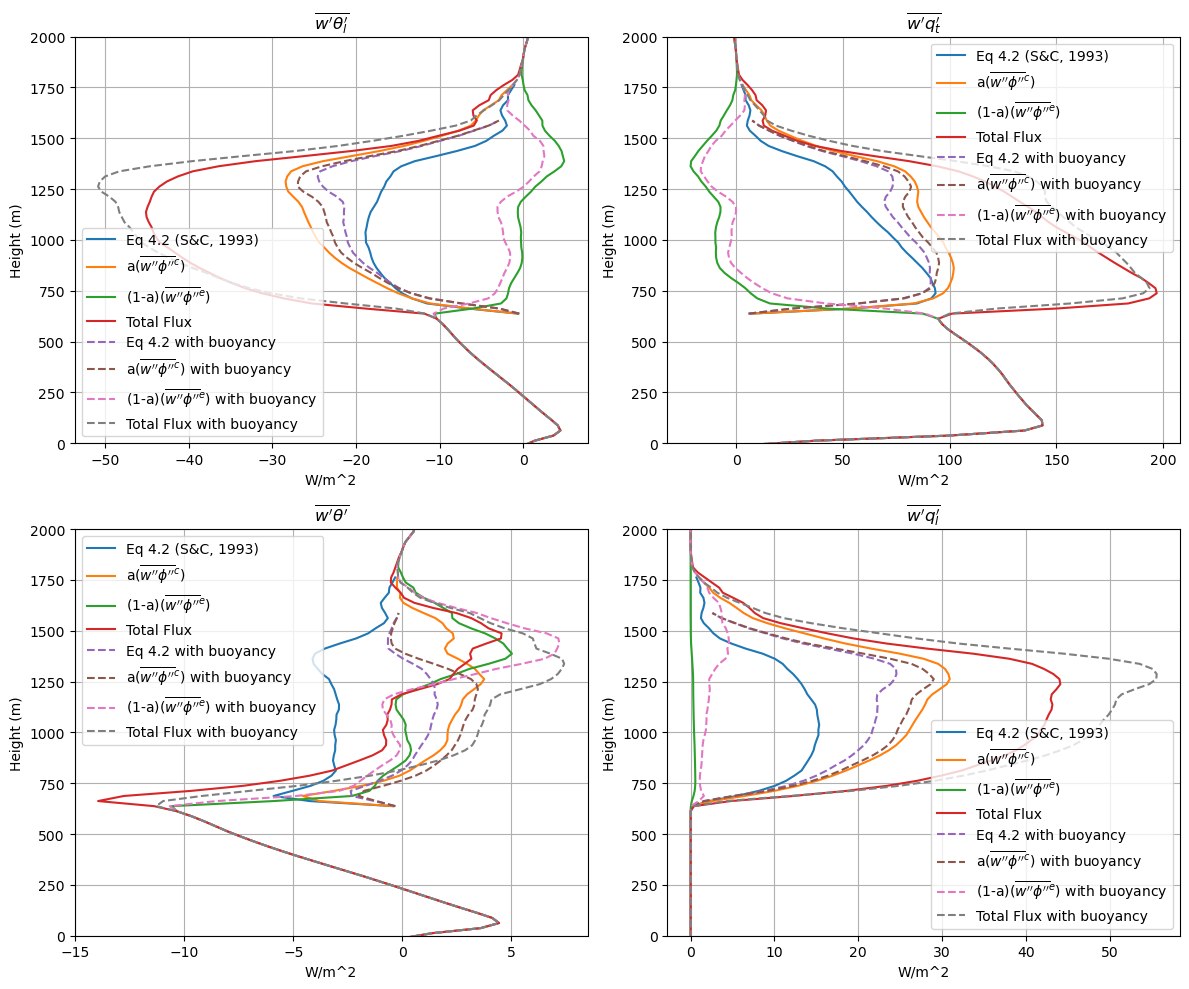

In [3]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Thresholds
liquid_water_threshold = 0.00001

# Constants
rho_0 = 1.25       # kg/m^3
L_v = 2.5e6     # J/kg latent heat of vaporization
c_p = 1004.0       # J/kg/K specific heat capacity at constant pressure
R_d = 287.05       # J/kg/K gas constant for dry air
p_0 = 100000.0     # Pa standard pressure at sea level

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'
buoyancy_file = '/Users/jure/PhD/coding/RICO_1hr/rico.buoyancy.nc'

def load_data_all_levels(filename, var_name, timestep=None):
    with nc.Dataset(filename) as ds:
        var = ds[var_name]
        dims = var.dimensions
        # Build index to access data
        index = []
        for dim in dims:
            if dim == 'time':
                if timestep is None:
                    raise ValueError(f"'timestep' must be provided when loading variable '{var_name}' with time dimension")
                index.append(timestep)
            else:
                index.append(slice(None))
        data = var[tuple(index)].astype(np.float64)
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def calculate_theta(theta_l_data, l_data, p_data):
    exner = (p_data / p_0) ** (R_d / c_p)
    T = theta_l_data * exner + (L_v * l_data) / c_p
    theta = T / exner
    return theta

def calculate_M_c_values(w_data, l_data, variable_data, liquid_water_threshold, multiplier, buoyancy_data=None):
    M_c_values = []
    active_cloudy_values = []
    environment_values = []
    total_flux_values = []

    for z in range(w_data.shape[0]):
        # Cloudy and environment masks with buoyancy threshold
        if buoyancy_data is not None:
            cloudy_mask = (l_data[z, :, :] > liquid_water_threshold) & (buoyancy_data[z, :, :] > 0)
        else:
            cloudy_mask = l_data[z, :, :] > liquid_water_threshold
        environment_mask = ~cloudy_mask

        # Area fractions
        a = np.mean(cloudy_mask)

        # Mean vertical velocities and variable contents
        w_mean = np.mean(w_data[z, :, :])
        var_mean = np.mean(variable_data[z, :, :])

        # Check for empty masks to avoid errors
        if np.any(cloudy_mask):
            w_c = np.mean(w_data[z, :, :][cloudy_mask])
            var_c = np.mean(variable_data[z, :, :][cloudy_mask])
            w_prime_c = w_data[z, :, :][cloudy_mask] - w_mean
            var_prime_c = variable_data[z, :, :][cloudy_mask] - var_mean
            line1 = a * np.mean(w_prime_c * var_prime_c) * multiplier
        else:
            w_c = np.nan
            var_c = np.nan
            line1 = np.nan

        if np.any(environment_mask):
            w_e = np.mean(w_data[z, :, :][environment_mask])
            var_e = np.mean(variable_data[z, :, :][environment_mask])
            w_prime_e = w_data[z, :, :][environment_mask] - w_mean
            var_prime_e = variable_data[z, :, :][environment_mask] - var_mean
            line2 = (1 - a) * np.mean(w_prime_e * var_prime_e) * multiplier
        else:
            w_e = np.nan
            var_e = np.nan
            line2 = np.nan

        # Calculate M_c
        if not np.isnan(w_c) and not np.isnan(w_e) and not np.isnan(var_c) and not np.isnan(var_e):
            M_c = a * (1 - a) * (w_c - w_e)
            result = M_c * (var_c - var_e) * multiplier
        else:
            result = np.nan

        # Append the result for the current vertical level
        M_c_values.append(result)
        active_cloudy_values.append(line1)
        environment_values.append(line2)

        # Calculate total flux using np.nansum to handle NaNs
        total_flux = np.nansum([result, line1, line2])
        total_flux_values.append(total_flux)

    # Convert the result lists to numpy arrays
    M_c_values = np.array(M_c_values)
    active_cloudy_values = np.array(active_cloudy_values)
    environment_values = np.array(environment_values)
    total_flux_values = np.array(total_flux_values)

    return M_c_values, active_cloudy_values, environment_values, total_flux_values

def average_M_c_values_over_time(start_timestep, end_timestep, variable_data_loader, multiplier, use_buoyancy=False):
    M_c_values_total = None
    active_cloudy_values_total = None
    environment_values_total = None
    total_flux_values_total = None

    num_timesteps = end_timestep - start_timestep

    for timestep in range(start_timestep, end_timestep):
        w_data = load_data_all_levels(w_file, 'w', timestep)
        l_data = load_data_all_levels(l_file, 'l', timestep)
        variable_data = variable_data_loader(timestep)
        if use_buoyancy:
            buoyancy_data = load_data_all_levels(buoyancy_file, 'buoyancy', timestep)
        else:
            buoyancy_data = None

        M_c_values, active_cloudy_values, environment_values, total_flux_values = calculate_M_c_values(
            w_data, l_data, variable_data, liquid_water_threshold, multiplier, buoyancy_data=buoyancy_data
        )

        if M_c_values_total is None:
            M_c_values_total = M_c_values
            active_cloudy_values_total = active_cloudy_values
            environment_values_total = environment_values
            total_flux_values_total = total_flux_values
        else:
            M_c_values_total += M_c_values
            active_cloudy_values_total += active_cloudy_values
            environment_values_total += environment_values
            total_flux_values_total += total_flux_values

    M_c_values_total /= num_timesteps
    active_cloudy_values_total /= num_timesteps
    environment_values_total /= num_timesteps
    total_flux_values_total /= num_timesteps

    return M_c_values_total, active_cloudy_values_total, environment_values_total, total_flux_values_total

# Specify the time range to analyze (e.g., timesteps 15 to 25)
start_timestep = 5
end_timestep = 8

# Load height values
zt_values = load_zt_values(l_file)

# Calculate and average M_c values for liquid water content without buoyancy threshold
M_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(l_file, 'l', timestep), rho_0 * L_v)

# Calculate and average M_c values for liquid water content with buoyancy threshold
M_c_l_values_buoyancy, active_cloudy_l_values_buoyancy, environment_l_values_buoyancy, total_flux_l_values_buoyancy = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(l_file, 'l', timestep), rho_0 * L_v, use_buoyancy=True)

# Repeat the above steps for total water content
M_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(q_file, 'q', timestep), rho_0 * L_v)

M_c_qt_values_buoyancy, active_cloudy_qt_values_buoyancy, environment_qt_values_buoyancy, total_flux_qt_values_buoyancy = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(q_file, 'q', timestep), rho_0 * L_v, use_buoyancy=True)

# For liquid water potential temperature
M_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(t_file, 't', timestep), rho_0 * c_p)

M_c_theta_l_values_buoyancy, active_cloudy_theta_l_values_buoyancy, environment_theta_l_values_buoyancy, total_flux_theta_l_values_buoyancy = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(t_file, 't', timestep), rho_0 * c_p, use_buoyancy=True)

# For theta using the new function
def variable_data_loader_theta(timestep):
    theta_l_data = load_data_all_levels(t_file, 't', timestep)
    l_data = load_data_all_levels(l_file, 'l', timestep)
    p_data = load_data_all_levels(p_file, 'p', timestep)
    theta = calculate_theta(theta_l_data, l_data, p_data)
    return theta

M_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values = average_M_c_values_over_time(
    start_timestep, end_timestep, variable_data_loader_theta, rho_0 * c_p)

M_c_theta_values_buoyancy, active_cloudy_theta_values_buoyancy, environment_theta_values_buoyancy, total_flux_theta_values_buoyancy = average_M_c_values_over_time(
    start_timestep, end_timestep, variable_data_loader_theta, rho_0 * c_p, use_buoyancy=True)

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

def plot_with_additional_lines(ax, M_c_values, active_cloudy_values, environment_values, total_flux_values, title,
                               M_c_values_buoyancy=None, active_cloudy_values_buoyancy=None,
                               environment_values_buoyancy=None, total_flux_values_buoyancy=None):
    ax.plot(M_c_values, zt_values, label='Eq 4.2 (S&C, 1993)')
    ax.plot(active_cloudy_values, zt_values, label='a($\\overline{w\'\'\\phi\'\'}^c$)')
    ax.plot(environment_values, zt_values, label='(1-a)($\\overline{w\'\'\\phi\'\'}^e$)')
    ax.plot(total_flux_values, zt_values, label='Total Flux')

    if M_c_values_buoyancy is not None:
        ax.plot(M_c_values_buoyancy, zt_values, linestyle='--', label='Eq 4.2 with buoyancy')
        ax.plot(active_cloudy_values_buoyancy, zt_values, linestyle='--', label='a($\\overline{w\'\'\\phi\'\'}^c$) with buoyancy')
        ax.plot(environment_values_buoyancy, zt_values, linestyle='--', label='(1-a)($\\overline{w\'\'\\phi\'\'}^e$) with buoyancy')
        ax.plot(total_flux_values_buoyancy, zt_values, linestyle='--', label='Total Flux with buoyancy')

    ax.set_xlabel('W/m^2')
    ax.set_ylabel('Height (m)')
    ax.set_title(title)
    ax.grid(True)
    ax.set_ylim([0, 2000])
    ax.legend()

plot_with_additional_lines(ax1, M_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values, r'$\overline{w^{\prime}\theta_l^{\prime}}$',
                           M_c_theta_l_values_buoyancy, active_cloudy_theta_l_values_buoyancy, environment_theta_l_values_buoyancy, total_flux_theta_l_values_buoyancy)

plot_with_additional_lines(ax2, M_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values, r'$\overline{w^{\prime}q_t^{\prime}}$',
                           M_c_qt_values_buoyancy, active_cloudy_qt_values_buoyancy, environment_qt_values_buoyancy, total_flux_qt_values_buoyancy)

plot_with_additional_lines(ax3, M_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values, r'$\overline{w^{\prime}\theta^{\prime}}$',
                           M_c_theta_values_buoyancy, active_cloudy_theta_values_buoyancy, environment_theta_values_buoyancy, total_flux_theta_values_buoyancy)

plot_with_additional_lines(ax4, M_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values, r'$\overline{w^{\prime}q_l^{\prime}}$',
                           M_c_l_values_buoyancy, active_cloudy_l_values_buoyancy, environment_l_values_buoyancy, total_flux_l_values_buoyancy)

plt.tight_layout()
plt.show()
